# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

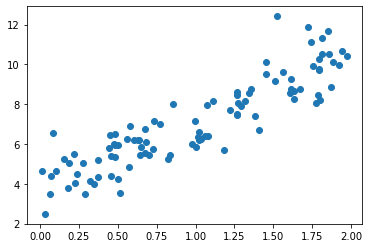

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

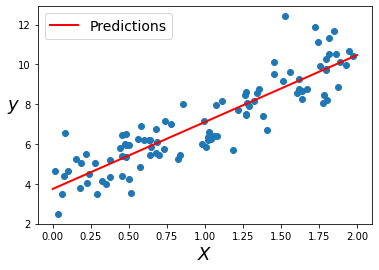

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

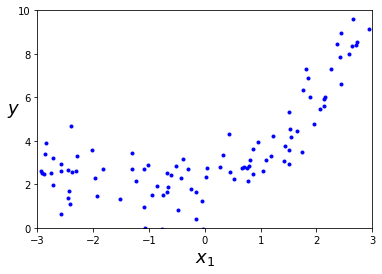

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

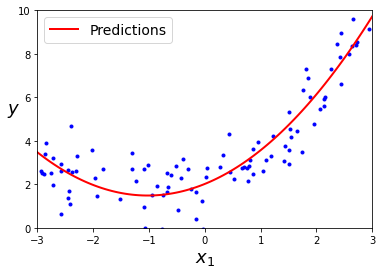

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

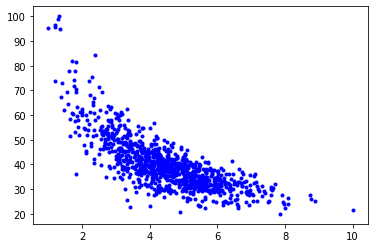

In [27]:
plt.plot(X,y,'b.')

In [28]:
#lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X,y)

LinearRegression()

In [29]:
linear_reg.coef_

array([-6.0333683])

In [30]:
linear_reg.intercept_

67.03904193389238

y' = -6.03X + 67.03

In [31]:
y_pred = linear_reg.predict(X)

In [32]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.921245677483368
Root Mean Squared Error: 6.871474273023592
r2_score 0.5789767558506287


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


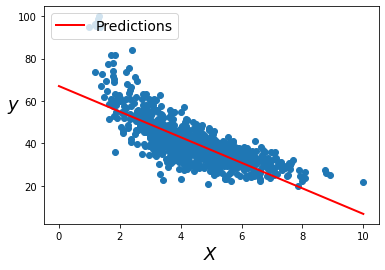

In [33]:
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [34]:
#polinomial
poly_transform = PolynomialFeatures(degree=2, include_bias = False)
polyX = poly_transform.fit_transform(X)

polyX

array([[  1.        ,   1.        ],
       [  1.18599365,   1.40658094],
       [  1.19149864,   1.41966901],
       ...,
       [  8.78088812,  77.10399623],
       [  8.89769971,  79.16906006],
       [ 10.        , 100.        ]])

In [35]:
poly_regression = LinearRegression(fit_intercept=True)
poly_regression.fit(polyX, y)

LinearRegression()

In [36]:
poly_regression.coef_


array([-16.82425278,   1.17336718])

In [37]:
poly_regression.intercept_


89.73719677939121

y' = -16.82X + 1.17x^2 + 89.73

In [38]:
y_pred = poly_regression.predict(polyX)


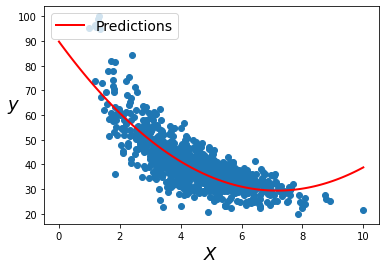

In [39]:
X_fit = np.linspace(0, 10, 100).reshape(100,1)
polyX_fit = poly_transform.fit_transform(X_fit)
y_fit = poly_regression.predict(polyX_fit)

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.538765565228896
Root Mean Squared Error: 6.129173450227568
r2_score 0.6650268116056028


In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [42]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

Lineal Regression

In [44]:
X_train.shape


(800, 1)

In [45]:
y_train.shape


(800,)

In [46]:
y_test.shape


(200,)

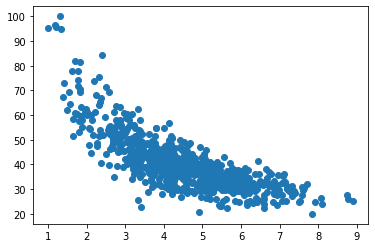

In [47]:
plt.scatter(X_train, y_train)

In [48]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


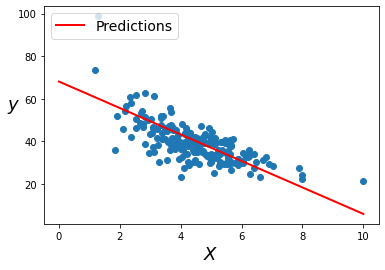

In [49]:
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [50]:
linear_reg.coef_


array([-6.22263745])

In [51]:
linear_reg.intercept_


68.08187672497846

In [52]:
y_pred = linear_reg.predict(X_train)
from sklearn import metrics
from sklearn.metrics import r2_score
linear_Mae_train=metrics.mean_absolute_error(y_train,y_pred)
linear_r2_train=r2_score(y_train,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score', r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.983664639039784
Root Mean Squared Error: 6.930601695798021
r2_score 0.594243664202029


In [53]:
y_pred = linear_reg.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
linear_Mae=metrics.mean_absolute_error(y_test,y_pred)
linear_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 4.83324114398872
Root Mean Squared Error: 6.6682038827508405
r2_score 0.48439969577999376


Polynomical Regression

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)##dividimos los datos


In [55]:
y_train.shape


(800,)

In [56]:
y_test.shape


(200,)

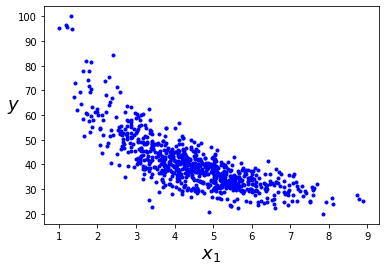

In [57]:
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(degree=3, include_bias = False)
polyX = poly_transform.fit_transform(X_train)
polyX

array([[  5.65669179,  31.99816198, 181.00374013],
       [  5.53635996,  30.65128163, 169.69652839],
       [  2.25713058,   5.09463847,  11.49926431],
       ...,
       [  2.64655085,   7.00423138,  18.53705446],
       [  5.18000789,  26.83248172, 138.99246696],
       [  6.37652342,  40.66005096, 259.26976735]])

In [59]:
poly_regression = LinearRegression(fit_intercept=True)
poly_regression.fit(polyX, y_train)

LinearRegression()

In [60]:
poly_regression.coef_


array([-35.3746951 ,   5.28612952,  -0.28112892])

In [61]:
poly_regression.intercept_


115.22180379591046

In [62]:
poly_transform = PolynomialFeatures(degree=3, include_bias = False)
polyX = poly_transform.fit_transform(X_train)

In [63]:
y_pred = poly_regression.predict(polyX)


In [64]:
from sklearn import metrics
from sklearn.metrics import r2_score
Poly_Mae_train=metrics.mean_absolute_error(y_train,y_pred)
Poly_r2_train=r2_score(y_train,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred ))

Error medio Absoluto (MAE): 4.462630935588183
Root Mean Squared Error: 5.858467673318268
r2_score 0.7100711021026239


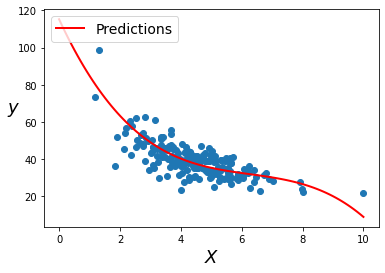

In [65]:
X_fit = np.linspace(0, 10, 100).reshape(100,1)
polyX_fit = poly_transform.fit_transform(X_fit)

y_fit = poly_regression.predict(polyX_fit)

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [66]:
poly_transform = PolynomialFeatures(degree=3, include_bias = False)
polyX = poly_transform.fit_transform(X_test)
y_pred = poly_regression.predict(polyX)

In [67]:
from sklearn import metrics
from sklearn.metrics import r2_score
Poly_Mae=metrics.mean_absolute_error(y_test,y_pred)
Poly_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.6058129615113925
Root Mean Squared Error: 6.209999522706177
r2_score 0.5528239263527293


Ridge

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)##dividimos los datos


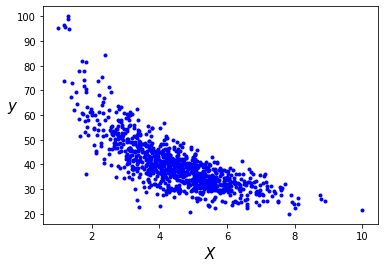

In [69]:
plt.plot(X, y,"b.")
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15);

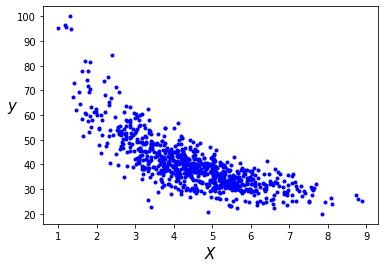

In [70]:
plt.plot(X_train, y_train,"b.")
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15);

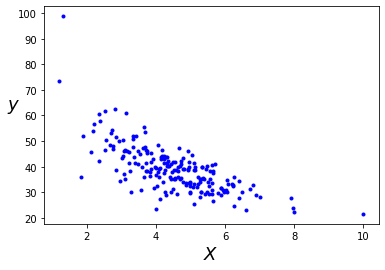

In [71]:
plt.plot(X_test, y_test,"b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);

In [72]:
X_train2=X_train.to_numpy().reshape(-1,1)


In [73]:
model = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [74]:
y_pred = model.predict(X_test)


In [75]:
order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

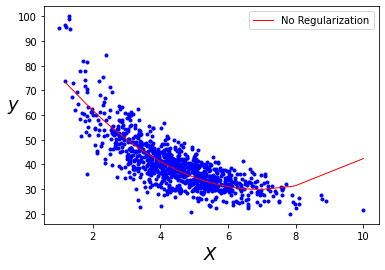

In [76]:
plt.plot(X, y, "b.")
plt.plot(X_test2, y_pred2, "r-", linewidth=1, label="No Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [77]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha=1, solver = 'cholesky', random_state = 42,max_iter=1000))])
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge',
                 Ridge(alpha=1, max_iter=1000, random_state=42,
                       solver='cholesky'))])

In [78]:
y_pred = model_ridge.predict(X_train)
Ridge_Mae_train=metrics.mean_absolute_error(y_train,y_pred)
Ridge_r2_train=r2_score(y_train,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score', r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.453130806314608
Root Mean Squared Error: 5.948178018959322
r2_score 0.7011237920037103


In [79]:
y_pred = model_ridge.predict(X_test)

order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

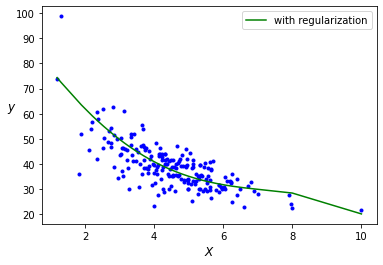

In [80]:
plt.plot(X_test, y_test, "b.")
plt.plot(X_test2, y_pred2, "g-",label="with regularization")
plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper right", fontsize=10);

In [81]:
X_test=X_test.to_numpy().reshape(-1,1)
y_pred = model.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
Ridge_Mae=metrics.mean_absolute_error(y_test,y_pred)
Ridge_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.762293483795133
Root Mean Squared Error: 6.513768934466413
r2_score 0.508005642552175


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


lasso

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)##dividimos los datos


In [83]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = .9,random_state = 10,tol=0.1,max_iter=1000))])
model_lasso.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, random_state=10, tol=0.1))])

In [84]:
y_pred = model_lasso.predict(X_train)


In [85]:
Lasso_MAE_train=metrics.mean_absolute_error(y_train,y_pred)
Lasso_r2_train=r2_score(y_train,y_pred)

In [86]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred ))

Error medio Absoluto (MAE): 4.8969775859486955
Root Mean Squared Error: 6.935898287947112
r2_score 0.5936232427341488


In [87]:
y_pred = model_lasso.predict(X_test)


In [88]:
order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

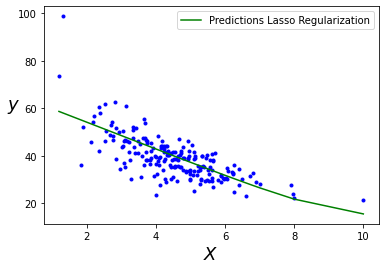

In [89]:
plt.plot(X_test, y_test, "b.")
plt.plot(X_test2, y_pred2, "g-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [90]:
y_pred = model_lasso.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
Lasso_MAE=metrics.mean_absolute_error(y_test,y_pred)
Lasso_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.646351122634725
Root Mean Squared Error: 6.486538755327113
r2_score 0.51211051393966


MAE

In [91]:
def diagramas(metricas):
    sumt=list()
    diagrama=metricas
    sumt.append(diagrama)
    return sumt

In [92]:
Metricas = list()
Metricas.append('Lin train')
Metricas.append('Lin')
Metricas.append('Poly train')
Metricas.append('Poly')
Metricas.append('Ridge train')
Metricas.append('Ridge')
Metricas.append('Lasso train')
Metricas.append('Lasso')

In [93]:
MAE_list = list()
MAE_list.append(linear_Mae_train)
MAE_list.append(linear_Mae)
MAE_list.append(Poly_Mae_train)
MAE_list.append(Poly_Mae)
MAE_list.append(Ridge_Mae_train)
MAE_list.append(Ridge_Mae)
MAE_list.append(Lasso_MAE_train)
MAE_list.append(Lasso_MAE)

MAE
[4.983664639039784, 4.83324114398872, 4.462630935588183, 4.6058129615113925, 4.453130806314608, 4.762293483795133, 4.8969775859486955, 4.646351122634725]


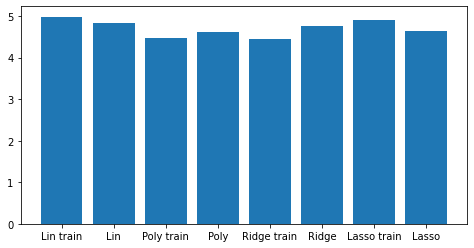

In [94]:
fig, ax = plt.subplots(figsize =(8, 4))
print("MAE")
print(MAE_list)
Metricas=list(Metricas)
plt.bar(Metricas,MAE_list)


plt.show()

In [95]:
R2_list = list()
R2_list.append(linear_r2_train)
R2_list.append(linear_r2)
R2_list.append(Poly_r2_train)
R2_list.append(Poly_r2)
R2_list.append(Ridge_r2_train)
R2_list.append(Ridge_r2)
R2_list.append(Lasso_r2_train)
R2_list.append(Lasso_r2)

r2
[0.594243664202029, 0.48439969577999376, 0.7100711021026239, 0.5528239263527293, 0.7011237920037103, 0.508005642552175, 0.5936232427341488, 0.51211051393966]


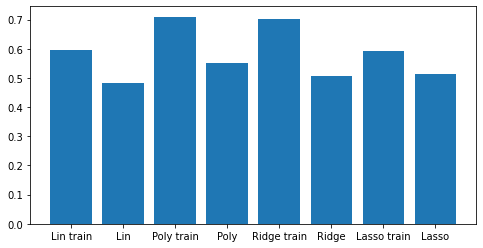

In [96]:
fig, ax = plt.subplots(figsize =(8, 4))
print("r2")
print(R2_list)
R2=list(R2_list)
plt.bar(Metricas,R2_list)


plt.show()

#Conclusiones del ejercicio 1

La regression lineal no fue buena para los datos que se tienen. Mostro mejor comportamiento el modelo polinomial. 

Para la empresa convendria usar el modelo MAE pero se requiere hacer mas pruebas. 

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np.random.seed(42)
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
1227,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
18849,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,...,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
19369,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
20164,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,...,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
7139,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,...,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [99]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [100]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


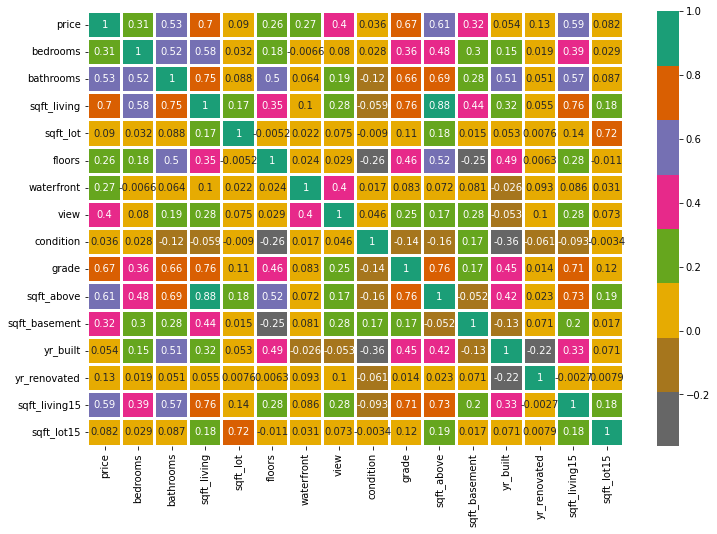

In [101]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [102]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [104]:
#tu codigo aquí

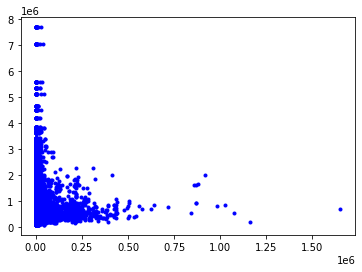

In [105]:
plt.plot(X_train,y_train,'b.')
plt.show()

In [106]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [107]:
linear_reg.coef_,

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),)

In [108]:
linear_reg.intercept_


array([6151359.2627409])

In [109]:
y_pred = linear_reg.predict(X_train)
from sklearn import metrics
from sklearn.metrics import r2_score
linear_Mae_train=metrics.mean_absolute_error(y_train,y_pred)
linear_r2_train=r2_score(y_train,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score', r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 139269.32939115583
Root Mean Squared Error: 214234.8822754647
r2_score 0.6529196653133833


In [110]:
y_pred = linear_reg.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
linear_Mae=metrics.mean_absolute_error(y_test,y_pred)
linear_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


In [111]:
from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(degree=3, include_bias = False)
polyX = poly_transform.fit_transform(X_train)
polyX

array([[5.00000000e+00, 2.75000000e+00, 3.75000000e+03, ...,
        7.06230720e+10, 1.64221278e+11, 3.81867106e+11],
       [4.00000000e+00, 4.50000000e+00, 5.25000000e+03, ...,
        3.02200000e+11, 5.84478976e+12, 1.13042910e+14],
       [3.00000000e+00, 2.50000000e+00, 2.88000000e+03, ...,
        9.21194624e+10, 3.27210820e+11, 1.16226168e+12],
       ...,
       [3.00000000e+00, 2.25000000e+00, 1.78000000e+03, ...,
        1.73857625e+10, 8.77923438e+10, 4.43322266e+11],
       [2.00000000e+00, 1.00000000e+00, 1.15000000e+03, ...,
        9.24639408e+09, 2.73030912e+10, 8.06215680e+10],
       [3.00000000e+00, 1.00000000e+00, 1.45000000e+03, ...,
        8.37158400e+09, 6.23039040e+10, 4.63684824e+11]])

In [112]:
poly_regression = LinearRegression(fit_intercept=True)
poly_regression.fit(polyX, y_train)
poly_regression.intercept_

array([19759145.24258333])

In [113]:
poly_regression.coef_


array([[ 3.17395792e+02, -2.70130239e+02,  1.30610945e+01,
        -1.40757708e+01,  2.62496809e+00,  3.24633595e+00,
        -8.08938960e-01,  3.60826046e-01, -6.17577143e-01,
         1.54124566e-01,  9.07922470e-01, -2.42302232e-01,
         1.57944629e-01, -4.12303248e-01, -1.89494993e+01,
         2.57497810e-01,  3.31180922e-01,  2.56156276e+01,
        -9.51793255e-02, -6.36531339e-01,  6.24165339e-01,
        -6.14143248e-02,  9.57006257e-01,  1.21507890e+00,
         1.85183285e+01,  7.24785462e+00,  3.94289500e+02,
         4.24069045e+00,  5.07845227e+00, -1.89095034e+01,
        -4.03258004e-01, -2.08156624e+02, -6.15751437e+01,
        -4.82898236e-01, -6.40532068e-02, -8.73845428e-02,
        -1.73829295e-01, -5.97615346e-01, -1.69018199e+02,
        -3.91260224e+01, -1.76779529e+02, -4.47565136e+00,
        -1.70541213e+02,  1.09037853e+02, -3.48181375e-01,
         5.54961266e-03, -3.10542727e+02, -2.04577118e+01,
        -5.10909707e+01,  1.44081886e+02,  1.11581166e+0

In [114]:
polyX = poly_transform.fit_transform(X_train)

y_pred = poly_regression.predict(polyX)
from sklearn import metrics
from sklearn.metrics import r2_score
Poly_Mae_train=metrics.mean_absolute_error(y_train,y_pred)
Poly_r2_train=r2_score(y_train,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred ))

Error medio Absoluto (MAE): 120111.24464567527
Root Mean Squared Error: 174164.006294397
r2_score 0.7706142422681812


In [115]:
polyX = poly_transform.fit_transform(X_test)

y_pred = poly_regression.predict(polyX)

In [116]:
from sklearn import metrics
from sklearn.metrics import r2_score
Poly_Mae=metrics.mean_absolute_error(y_test,y_pred)
Poly_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 127640.87573988685
Root Mean Squared Error: 212376.50824233124
r2_score 0.7137146909613681


ridge

In [117]:
X_train2=X_train.to_numpy().reshape(-1,1)


In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
model = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [119]:
from sklearn import metrics
from sklearn.metrics import r2_score
Ridge_Mae=metrics.mean_absolute_error(y_test,y_pred)
Ridge_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 127640.87573988685
Root Mean Squared Error: 212376.50824233124
r2_score 0.7137146909613681


lasso

In [120]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 1, random_state = 42,tol=0.1,max_iter=1000))])


model_lasso.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42, tol=0.1))])

In [121]:
y_pred = model_lasso.predict(X_train)
from sklearn import metrics
from sklearn.metrics import r2_score

Lasso_MAE_train = metrics.mean_absolute_error(y_train, y_pred)
Lasso_r2_train= r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score', r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 113884.60002386104
Root Mean Squared Error: 162623.202988018
r2_score 0.8000070629856829


In [124]:
y_pred = model_lasso.predict(X_test)


In [125]:
from sklearn import metrics
from sklearn.metrics import r2_score
Lasso_MAE=metrics.mean_absolute_error(y_test,y_pred)
Lasso_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 127385.85985379248
Root Mean Squared Error: 254950.23977556612
r2_score 0.5874306511507208


In [126]:
Metricas = list()
Metricas.append('Lin train')
Metricas.append('Lin')
Metricas.append('Poly train')
Metricas.append('Poly')
Metricas.append('Ridge train')
Metricas.append('Ridge')
Metricas.append('Lasso train')
Metricas.append('Lasso')

In [127]:
MAE_list = list()
MAE_list.append(linear_Mae_train)
MAE_list.append(linear_Mae)
MAE_list.append(Poly_Mae_train)
MAE_list.append(Poly_Mae)
MAE_list.append(Ridge_Mae_train)
MAE_list.append(Ridge_Mae)
MAE_list.append(Lasso_MAE_train)
MAE_list.append(Lasso_MAE)

MAE
[139269.32939115583, 137480.1388273178, 120111.24464567527, 127640.87573988685, 4.453130806314608, 127640.87573988685, 113884.60002386104, 127385.85985379248]


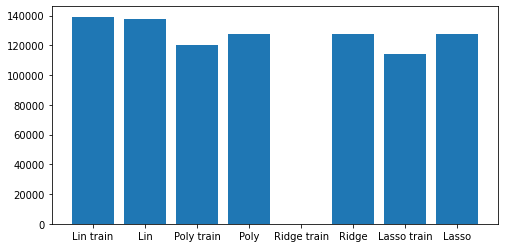

In [128]:
fig, ax = plt.subplots(figsize =(8, 4))
print("MAE")
print(MAE_list)
Metricas=list(Metricas)
MAE=list(MAE_list)
plt.bar(Metricas,MAE_list)


plt.show()

r2
[0.6529196653133833, 0.6579723205007814, 0.7706142422681812, 0.7137146909613681, 0.7011237920037103, 0.7137146909613681, 0.8000070629856829, 0.5874306511507208]


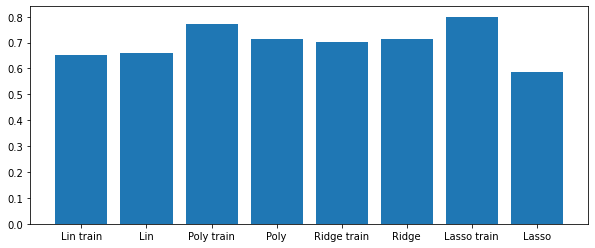

In [129]:
R2_list = list()
R2_list.append(linear_r2_train)
R2_list.append(linear_r2)
R2_list.append(Poly_r2_train)
R2_list.append(Poly_r2)
R2_list.append(Ridge_r2_train)
R2_list.append(Ridge_r2)
R2_list.append(Lasso_r2_train)
R2_list.append(Lasso_r2)
fig, ax = plt.subplots(figsize=(10, 4))
print("r2")
print(R2_list)
plt.bar(Metricas, R2_list)
plt.show()

# Conclusiones

El comportamiento de Ridge es mas estable en cuanto a sus resultados. Pudiera ser una buena  opcion. 